In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the input image
image = cv2.imread('E:/ARK PERCEPTION/Luna/Input/table.png')
resized_image = cv2.resize(image, (300,250))
cv2.imwrite('E:/ARK PERCEPTION/Luna/output/resized_image.png', resized_image)

True

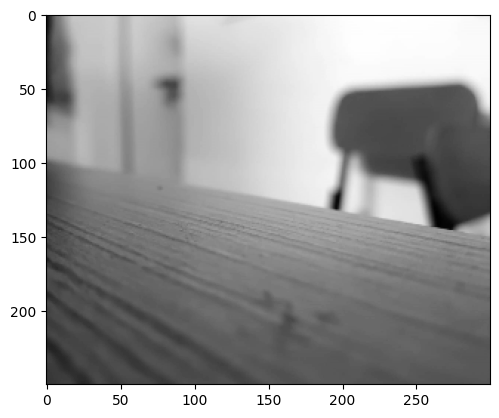

In [4]:
# Convert the image to grayscale
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(gray, cmap='gray')
#plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

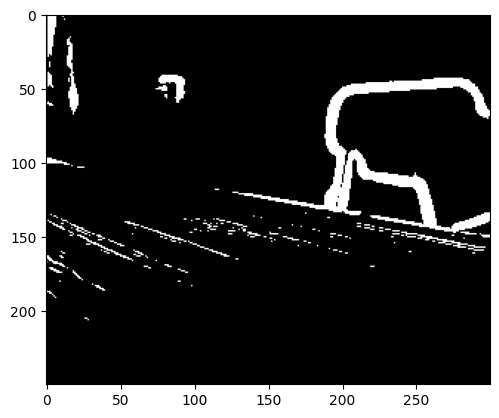

In [5]:
#create laplace kernel matrix 

#laplacian_kernel = np.array([[0, 1, 0],
#                             [1, -4, 1],
#                             [0, 1, 0]])

#edge_image = cv2.filter2D(resized_image, -7, laplacian_kernel)
#this is for canny 
#edge_image = cv2.Canny(resized_image, threshold1=80, threshold2=150)

#edge_image = cv2.Canny(resized_image, threshold1=50, threshold2=150)
# Apply Sobel operator to calculate gradients in x and y directions
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Normalize the gradient magnitude to 0-255
#gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Apply thresholding to obtain binary edge image
threshold_value = 60

_, edge_image = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite('E:/ARK PERCEPTION/Luna/output/edge.png', edge_image)

#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(edge_image, cmap='gray')
#plt.axis('off')  # Turn off axis numbers and ticks
plt.show()



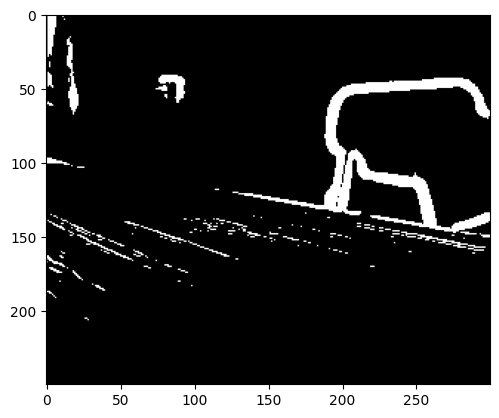

In [6]:
edge_image = cv2.imread('E:/ARK PERCEPTION/Luna/Output/edge.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(edge_image, cmap='gray')
#plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

Number of detected lines: 185
Line: (199, 61) to (199, 50)
Line: (201, 101) to (201, 91)
Line: (197, 133) to (197, 124)
Line: (190, 131) to (190, 119)
Line: (17, 64) to (17, 33)
Line: (192, 93) to (192, 58)
Line: (191, 92) to (191, 61)
Line: (1, 48) to (1, 39)
Line: (203, 129) to (203, 99)
Line: (194, 94) to (194, 55)
Line: (204, 125) to (204, 94)
Line: (195, 95) to (195, 54)
Line: (3, 27) to (3, 0)
Line: (196, 126) to (196, 84)
Line: (16, 149) to (16, 149)
Line: (200, 132) to (200, 114)
Line: (254, 138) to (254, 111)
Line: (258, 143) to (258, 118)
Line: (223, 52) to (223, 46)
Line: (293, 68) to (293, 53)
Line: (198, 133) to (198, 89)
Line: (255, 143) to (255, 112)
Line: (18, 67) to (18, 42)
Line: (16, 36) to (16, 19)
Line: (263, 50) to (263, 43)
Line: (193, 132) to (193, 115)
Line: (257, 143) to (257, 115)
Line: (202, 134) to (202, 102)
Line: (252, 128) to (252, 110)
Line: (296, 69) to (296, 60)
Line: (15, 35) to (15, 22)
Line: (295, 141) to (295, 135)
Line: (253, 151) to (253, 149)
L

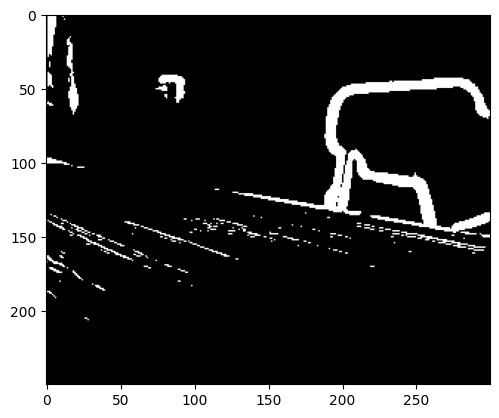

In [44]:
# Binarize the edge image (if necessary)
_, binary_image = cv2.threshold(edge_image, 127, 255, cv2.THRESH_BINARY)

#why 127 

# Define Hough Transform parameters
theta_resolution = 270 # Resolution of theta in degrees
rho_resolution = 1   # Resolution of rho in pixels
threshold = 10     # Minimum number of votes to consider a line
min_line_length = 10 # Minimum line length
max_line_gap = 0.5    # Maximum gap between line segments to treat them as a single line

# Perform Hough Transform
lines = cv2.HoughLinesP(binary_image, rho_resolution, theta_resolution, threshold, min_line_length, max_line_gap)

if lines is not None:
    num_lines = len(lines)
    print(f"Number of detected lines: {num_lines}")
else:
    print("No lines detected.")



# Draw detected lines on the original image
output_image = cv2.cvtColor(edge_image, cv2.COLOR_GRAY2BGR)  # Convert to color for drawing lines
plt.imshow(output_image)
#if lines is not None:
   # for line in lines:
   #     x1, y1, x2, y2 = line[0]
   #     cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        print(f"Line: ({x1}, {y1}) to ({x2}, {y2})")

# Display or save the result

plt.imshow(output_image)
#cv2.imshow('Detected Lines', output_image)


# Draw detected lines on the original image


compleyed writing lines


True

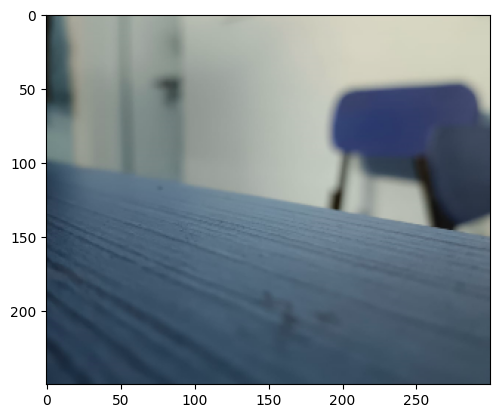

In [45]:
table_image = cv2.imread('E:/ARK PERCEPTION/Luna/output/resized_image.png')
plt.imshow(table_image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
# Draw the line on the image
        cv2.line(table_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

print("compleyed writing lines")
# Save the final result
cv2.imwrite('E:/ARK PERCEPTION/Luna/output/detected_lines2.png', table_image)